# Gauss-Newton for XRD

a simple example

In [1]:
from XRDXRFutils import DataXRD, FastSpectraXRD, DatabaseXRD, PhaseList, GaussNewton, GammaSearch

from numpy import prod,array,minimum,maximum,log,zeros,trapz,where

from matplotlib.pyplot import figure, xlim, ylim, xlabel, ylabel, legend, plot, fill_between, imshow, subplots, sca, show
from matplotlib import rcParams

### Loading data

In [3]:
#path_shared = '/home/shared/'
path_shared = '../../shared/'

path_xrd = path_shared + 'dataXRDXRF/MunchMuseum/M491/ProfiloXRD/'
path_database = path_shared + 'Database/'

spectrum = (FastSpectraXRD()
    .from_file(path_xrd + 'Frame2906.dat')
    .calibrate_from_file(path_xrd + 'calibration.ini')
    #.calibrate_from_parameters([-1180, 1970, 51])
    .remove_background()
)

database = DatabaseXRD().read_cifs(path_database)

lazurite = database['Lazurite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][0]
barite = database['Barite'][0]
spinel = database['Spinel'][0]
calcite = database['Calcite'][0]
hematite = database['Hematite'][0]

phases = PhaseList([PhaseList([hydrocerussite, cinnabar]), hydrocerussite, lazurite, cinnabar, barite, spinel, calcite])

[-1209.49515984  1947.71768634    51.66346438]


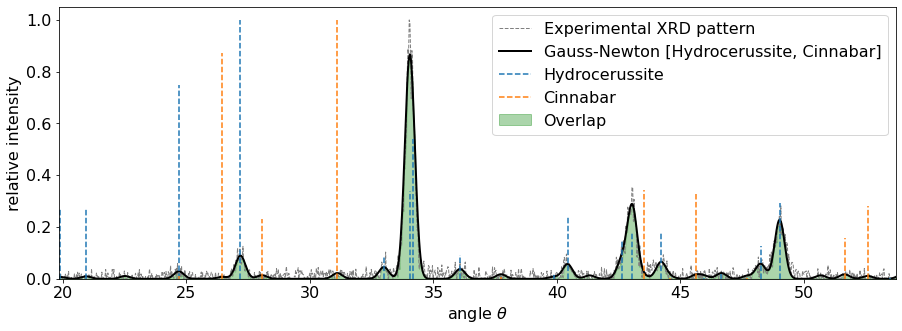

In [4]:
rcParams['font.size'] = 16

gs = GammaSearch(phases, spectrum).search()
gn = gs.selected
theta_min, theta_max = gn.theta_range()

print(gn.opt)

fig, ax = subplots(figsize = (15, 5))
sca(ax)

gn.plot_spectrum(c = 'grey', ls = '--', lw = 1, label = 'Experimental XRD pattern')
gn.plot(c = 'black', ls = '-', lw = 2, label = f'Gauss-Newton {gn.label}')
gn.phase.plot()
ax.fill_between(gn.theta.squeeze(), gn.overlap(), color = 'g', alpha = 0.33, label = 'Overlap')
ax.legend(loc = 'upper right')

ax.set_xlim(theta_min, theta_max)
ax.set_ylim(0, 1.05)
ax.set_xlabel(r'angle $\theta$')
ax.set_ylabel(r'relative intensity')

show()

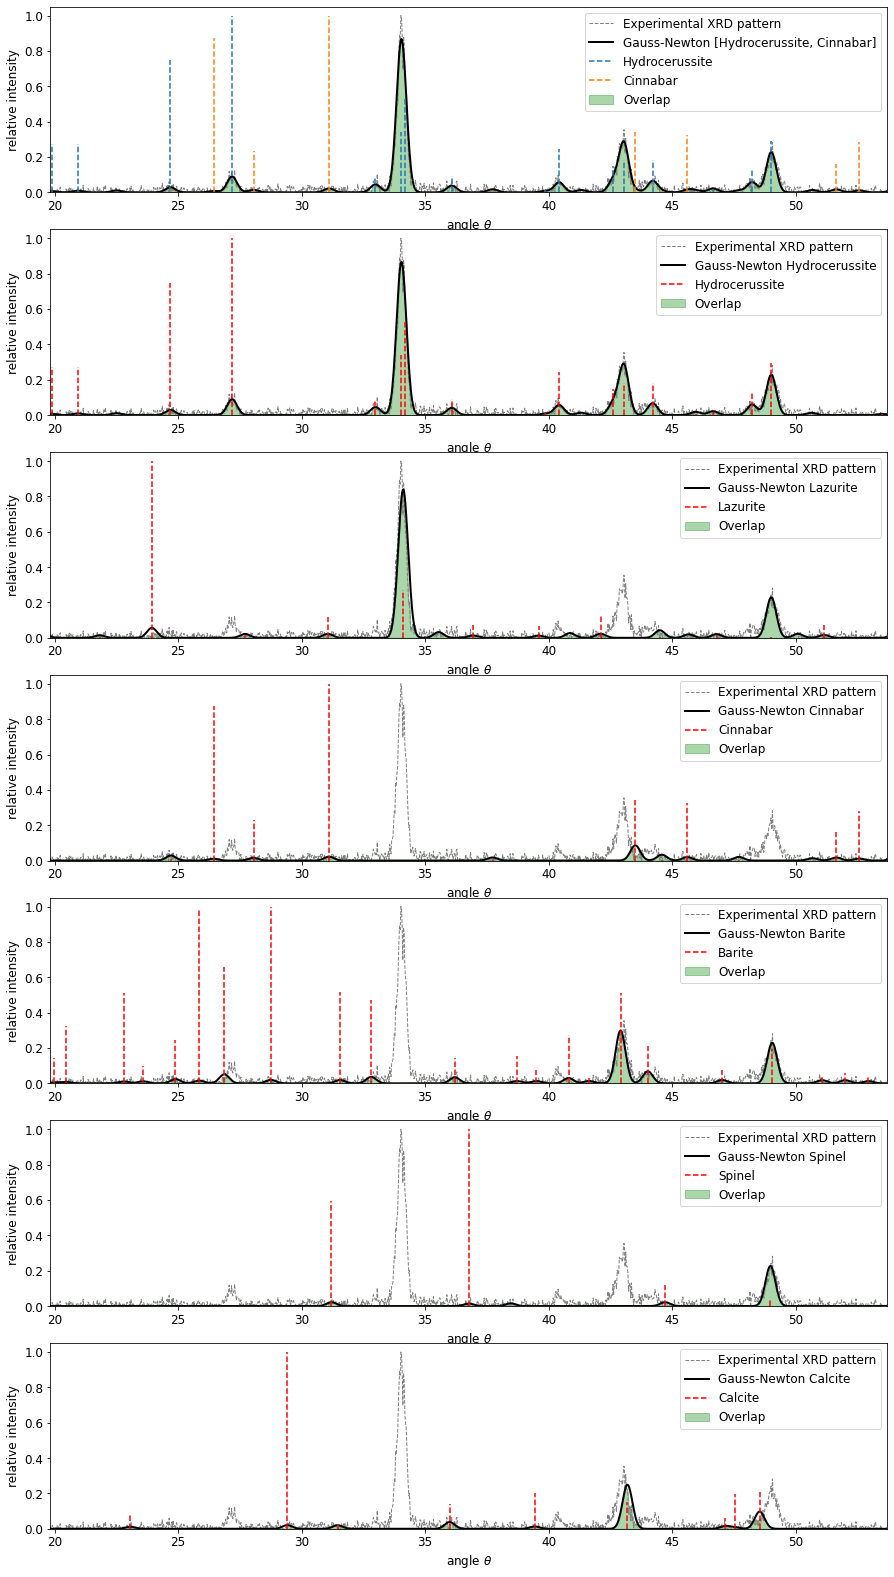

In [5]:
rcParams['font.size'] = 12

fig, axs = subplots(len(gs), 1, figsize = (15, 4 * len(gs)))

for i, gn in enumerate(gs):
    ax = axs[i]
    sca(ax)
    gn.plot_spectrum(c = 'grey', ls = '--', lw = 1, label = 'Experimental XRD pattern')
    gn.plot(c = 'black', ls = '-', lw = 2, label = f'Gauss-Newton {gn.label}')
    gn.phase.plot()
    ax.fill_between(gn.theta.squeeze(), gn.overlap(), color = 'g', alpha = 0.33, label = 'Overlap')
    ax.legend(loc = 'upper right')
    
    ax.set_xlim(theta_min, theta_max)
    ax.set_ylim(0, 1.05)
    ax.set_xlabel(r'angle $\theta$')
    ax.set_ylabel(r'relative intensity')

show()